In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
# Fetch historical data for HDFC Bank (NSE: HDFCBANK.NS)
ticker = 'HDFCBANK.NS'
data = yf.download(ticker, start="2015-01-01", end="2025-07-11")
data=data['Close']
data

[*********************100%***********************]  1 of 1 completed


Ticker,HDFCBANK.NS
Date,
2015-01-01,436.521179
2015-01-02,442.596405
2015-01-05,438.859589
2015-01-06,432.027863
2015-01-07,433.288727
...,...
2025-07-04,1989.300049
2025-07-07,1987.400024
2025-07-08,2001.400024


In [8]:
data.isnull().sum()

Ticker
HDFCBANK.NS    0
dtype: int64

In [32]:
log_returns = np.log(data / data.shift(1)).dropna()
print(log_returns) #to calculate the returns values, based on the yesterday closing price


Ticker      HDFCBANK.NS
Date                   
2015-01-02     0.013821
2015-01-05    -0.008479
2015-01-06    -0.015689
2015-01-07     0.002914
2015-01-08     0.020788
...                 ...
2025-07-04     0.001107
2025-07-07    -0.000956
2025-07-08     0.007020
2025-07-09     0.004885
2025-07-10    -0.002489

[2597 rows x 1 columns]


In [33]:
# Estimate parameters
mu = log_returns.mean()      # Drift
sigma = log_returns.std()    # Volatility
S0 = data['HDFCBANK.NS'].iloc[-1]  # Correct way to get the latest price
S0

2006.199951171875

In [18]:
# Step 1: Define GBM function
def simulate_gbm(S0, mu, sigma, T=10, dt=1, n_sim=1):
    steps = int(T / dt)
    prices = np.zeros((steps + 1, n_sim))
    prices[0] = S0
    for t in range(1, steps + 1):
        rand = np.random.standard_normal(n_sim)
        prices[t] = prices[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand)
    return prices

# Step 2: Call the function
simulated_prices = simulate_gbm(S0, mu, sigma, T=10, dt=1, n_sim=1)

# Step 3: Print the results
print("Simulated Prices for Next 10 Days:")
for day, price in enumerate(simulated_prices[1:], start=1):
    print(f"Day {day}: ₹{price[0]:.2f}")

Simulated Prices for Next 10 Days:
Day 1: ₹2022.31
Day 2: ₹2008.87
Day 3: ₹1956.48
Day 4: ₹1964.62
Day 5: ₹1986.04
Day 6: ₹2014.90
Day 7: ₹1986.09
Day 8: ₹1990.20
Day 9: ₹1921.23
Day 10: ₹1951.63


In [19]:
# Simulate next 1 day
next_day_price = simulate_gbm(S0, mu, sigma, T=1, dt=1)[-1][0]
print(f"Simulated next day price: ₹{next_day_price:.2f}")


Simulated next day price: ₹2021.11


In [20]:
# Simulate next 10 days
prices_10d = simulate_gbm(S0, mu, sigma, T=10, dt=1, n_sim=1)
print("Simulated prices for next 10 days:")
for i, price in enumerate(prices_10d[1:], 1):
    print(f"Day {i}: ₹{price[0]:.2f}")


Simulated prices for next 10 days:
Day 1: ₹1999.92
Day 2: ₹2033.98
Day 3: ₹2034.42
Day 4: ₹2031.15
Day 5: ₹2023.44
Day 6: ₹1967.92
Day 7: ₹1964.05
Day 8: ₹1984.87
Day 9: ₹1974.39
Day 10: ₹1959.62


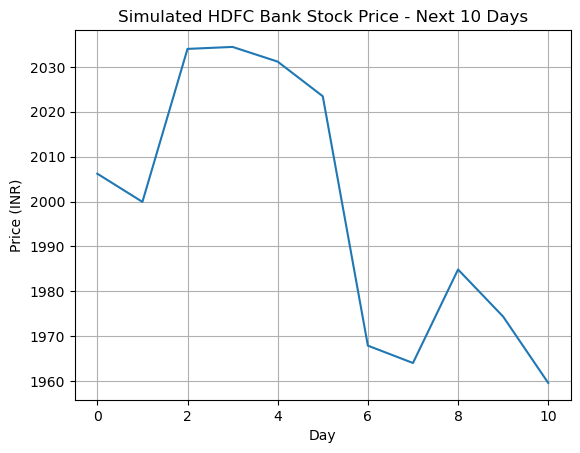

In [21]:
# Optional: Plot
plt.plot(prices_10d)
plt.title("Simulated HDFC Bank Stock Price - Next 10 Days")
plt.xlabel("Day")
plt.ylabel("Price (INR)")
plt.grid()
plt.show()

In [24]:
#simulate 1000 GBM Paths
def simulate_gbm(S0, mu, sigma, T=10, dt=1, n_sim=1000):
    steps = int(T / dt)
    prices = np.zeros((steps + 1, n_sim))
    prices[0] = S0
    for t in range(1, steps + 1):
        rand = np.random.standard_normal(n_sim)
        prices[t] = prices[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand)
    return prices

S0 = 2006.2      # Last known price of HDFC Bank
mu = 0.000245    # Average daily log return
sigma = 0.0153   # Daily volatility

# Call the function
np.random.seed(42)  # For consistent results
simulated_prices = simulate_gbm(S0, mu, sigma, T=10, dt=1, n_sim=1000)

# Check shape and print example
print(simulated_prices.shape)  # Should be (11, 1000)
print("First few prices of simulation 1:")
print(simulated_prices[:5, 0])  # Show first 5 days of 1st simulation


(11, 1000)
First few prices of simulation 1:
[2006.2        2021.76333149 2065.78058074 2044.81206922 1986.24195188]


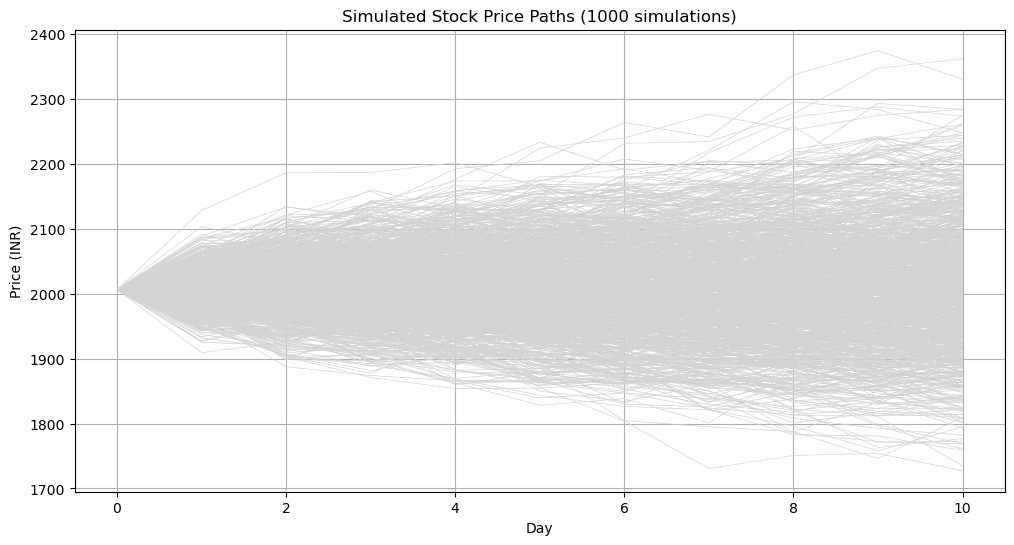

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(simulated_prices, color='lightgray', linewidth=0.5)
plt.title("Simulated Stock Price Paths (1000 simulations)")
plt.xlabel("Day")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [29]:
mean_forecast = simulated_prices.mean(axis=1)
percentile_025 = np.percentile(simulated_prices, 2.5, axis=1)
percentile_975 = np.percentile(simulated_prices, 97.5, axis=1)

print(mean_forecast)
print(percentile_025)
print(percentile_975)

[2006.2        2007.27544875 2009.92457393 2010.59375666 2010.50090715
 2009.47665298 2008.54182575 2008.16409409 2009.33728966 2010.41238615
 2010.48753612]
[2006.2        1950.71285448 1923.71330655 1909.86510254 1900.50344962
 1876.93623652 1866.98610449 1857.36902067 1844.78892882 1835.33397991
 1823.8056818 ]
[2006.2        2065.98183704 2096.26342135 2119.53828826 2131.25436513
 2147.8273748  2156.20247062 2165.69507517 2184.08864609 2212.34590546
 2214.48986026]


In [30]:
forecast_df = pd.DataFrame({
    'Day': range(len(mean_forecast)),
    'Mean_Price': mean_forecast,
    'Lower_95%': percentile_025,
    'Upper_95%': percentile_975
}).round(2)

forecast_df.set_index('Day', inplace=True)
forecast_df

,Mean_Price,Lower_95%,Upper_95%
Day,,,
0,2006.20,2006.20,2006.20
1,2007.28,1950.71,2065.98
2,2009.92,1923.71,2096.26
3,2010.59,1909.87,2119.54
4,2010.50,1900.50,2131.25
5,2009.48,1876.94,2147.83
6,2008.54,1866.99,2156.20
7,2008.16,1857.37,2165.70
8,2009.34,1844.79,2184.09


In [35]:
final_prices = simulated_prices[-1]
final_prices

array([1961.07029893, 1932.14216282, 1942.95255049, 2026.94898685,
       2012.11289753, 1989.93638086, 2086.82464765, 2044.17388939,
       2121.81615829, 2127.4299422 , 2041.61507931, 1985.37421022,
       1939.98383089, 1916.91096711, 2003.64529424, 1987.3911622 ,
       1823.51888459, 1877.93559891, 2060.53986831, 2049.03688706,
       2183.86536869, 1909.05994349, 1949.49706484, 1991.4690563 ,
       1878.58620698, 2004.57946447, 1974.28786081, 2008.20395033,
       1952.61656605, 1953.71807557, 1823.08959751, 1969.07940671,
       2129.00051016, 1847.90577928, 2045.59811799, 2361.90353002,
       1993.64682127, 1794.98108061, 1970.24082887, 2047.3627283 ,
       2161.07016307, 1991.95981404, 1999.27406845, 1911.7824953 ,
       2057.31373661, 1954.91894971, 2028.54714734, 2090.29575169,
       1973.19746334, 2013.15777603, 2034.43587285, 1950.60379558,
       2004.61452801, 2010.71001358, 1913.8179499 , 1925.08662039,
       2007.99001075, 2103.29789689, 2137.33151419, 2045.58755

In [44]:
#Monte carlo Simulation
returns = (final_prices / S0) - 1
expected_return = returns.mean()
print(f"Expected 10-day return: {expected_return:.4%}")

Expected 10-day return: 0.2137%


In [42]:
risk = returns.std()
print(f"Risk (Std Dev of return): {risk:.4%}")

Risk (Std Dev of return): 4.8797%


In [38]:
var_95 = np.percentile(returns, 5)  # 5th percentile
print(f"Value-at-Risk (95% confidence): {var_95:.2%}")

Value-at-Risk (95% confidence): -7.42%


In [39]:
cvar_95 = returns[returns <= var_95].mean()
print(f"Conditional VaR (CVaR): {cvar_95:.2%}")

Conditional VaR (CVaR): -9.38%


In [45]:
print(f"Expected 10-day return: {expected_return:.2%}")
print(f"Risk (Standard Deviation): {risk:.2%}")
print(f"Value-at-Risk (95% confidence): {var_95:.2%}")
print(f"Conditional VaR (CVaR): {cvar_95:.2%}")

Expected 10-day return: 0.21%
Risk (Standard Deviation): 4.88%
Value-at-Risk (95% confidence): -7.42%
Conditional VaR (CVaR): -9.38%


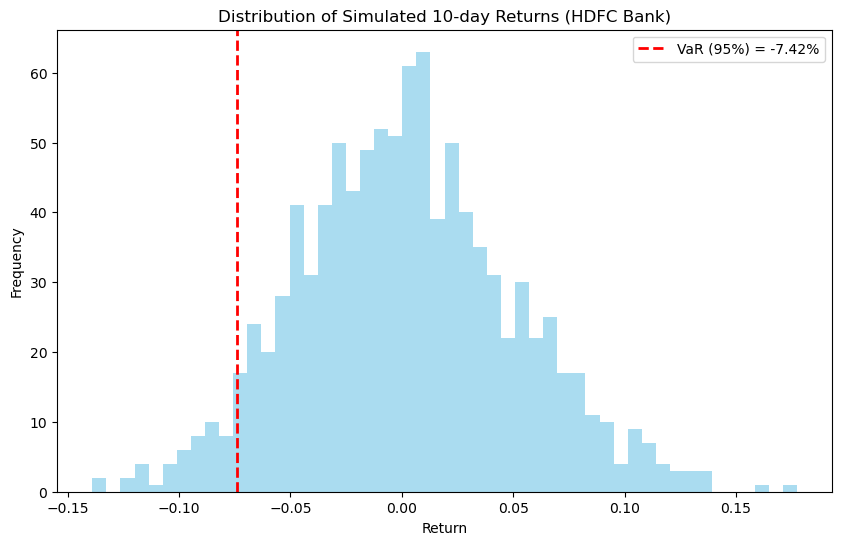

In [46]:
plt.figure(figsize=(10,6))
plt.hist(returns, bins=50, alpha=0.7, color='skyblue')
plt.axvline(var_95, color='r', linestyle='dashed', linewidth=2, label=f'VaR (95%) = {var_95:.2%}')
plt.title('Distribution of Simulated 10-day Returns (HDFC Bank)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#VaR tells you how bad can it get with a certain confidence, but CVaR tells you how bad is it on average if things do get that bad.